Columns: ['filename', 'label', 'class', 'coords']
Label counts: label
normal    667
cavity    460
Name: count, dtype: int64


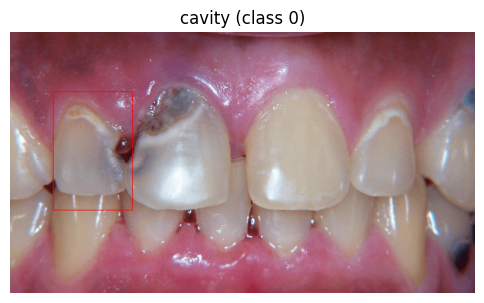

Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=sample_data/data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train215, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

train: Scanning /content/sample_data/data/train/labels.cache... 0 images, 287 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /content/sample_data/data/train/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 222.5±95.8 MB/s, size: 6.5 KB)


val: Scanning /content/sample_data/data/valid/labels.cache... 0 images, 93 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<?, ?it/s]

WARNING ⚠️ Labels are missing or empty in /content/sample_data/data/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train215/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train215
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G          0      57.91          0          0        640: 100%|██████████| 36/36 [04:11<00:00,  6.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:22<00:00,  3.80s/it]

                   all         93          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G          0      46.76          0          0        640: 100%|██████████| 36/36 [04:07<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:20<00:00,  3.48s/it]

                   all         93          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G          0       41.7          0          0        640:  94%|█████████▍| 34/36 [03:53<00:14,  7.03s/it]

In [ ]:
#!pip install pandas

import glob, pandas as pd, os

records = []
for txt in glob.glob("data/valid/labelTxt/*.txt"):
    lines = [line for line in open(txt).read().splitlines() if line.strip()]
    fname = os.path.basename(txt).replace('.txt', '.jpg')
    for line in lines:
        parts = line.split()
        if len(parts) == 10:
            # first 8 numbers are coordinates (x1,y1,x2,y2,x3,y3,x4,y4)
            coords = list(map(float, parts[:8]))
            label_text = parts[8]
            cls = int(parts[9])
            records.append({
                'filename': fname,
                'label': label_text,
                'class': cls,
                'coords': coords
            })
        else:
            # skip malformed rows
            continue

df = pd.DataFrame(records)
print("Columns:", df.columns.tolist())
print("Label counts:", df['label'].value_counts())
df.head()


#%% EDA plots
#!pip install matplotlib
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Select a random example
row = df.sample(1).iloc[0]
coords = row['coords']
xs = coords[0::2]
ys = coords[1::2]
xmin, xmax = min(xs), max(xs)
ymin, ymax = min(ys), max(ys)

# Load image with PIL and draw bounding box
img_path = os.path.join("data/valid/images", row['filename'])
img = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(img)
draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

# Display using matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(f"{row['label']} (class {row['class']})")
plt.axis('off')
plt.show()

#%% YOLOv5 training via Ultralytics
#!pip install ultralytics
#!pip install torchvision


from ultralytics import YOLO
model = YOLO('yolov8n.pt')
model.train(
    data='data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    name='train2'
)

#%% Evaluation
metrics = model.val()
print(metrics.box.map50, metrics.box.precision, metrics.box.recall)
